In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pylab as pl
%matplotlib inline

In [20]:
df = pd.read_csv("FuelConsumptionCo2.csv")
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [21]:
cdf = df[["ENGINESIZE", "CYLINDERS", "FUELCONSUMPTION_CITY","FUELCONSUMPTION_HWY", "FUELCONSUMPTION_COMB","CO2EMISSIONS"]]
cdf.head(9)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,9.9,6.7,8.5,196
1,2.4,4,11.2,7.7,9.6,221
2,1.5,4,6.0,5.8,5.9,136
3,3.5,6,12.7,9.1,11.1,255
4,3.5,6,12.1,8.7,10.6,244
5,3.5,6,11.9,7.7,10.0,230
6,3.5,6,11.8,8.1,10.1,232
7,3.7,6,12.8,9.0,11.1,255
8,3.7,6,13.4,9.5,11.6,267


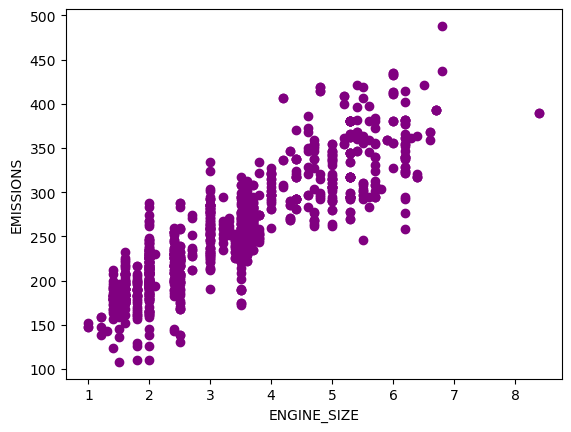

In [22]:
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS, color = 'purple')
plt.xlabel("ENGINE_SIZE")
plt.ylabel("EMISSIONS")
plt.show()


Creating train and test dataset

In [23]:
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]

#### TRAIN DATA DISTRIBUTION

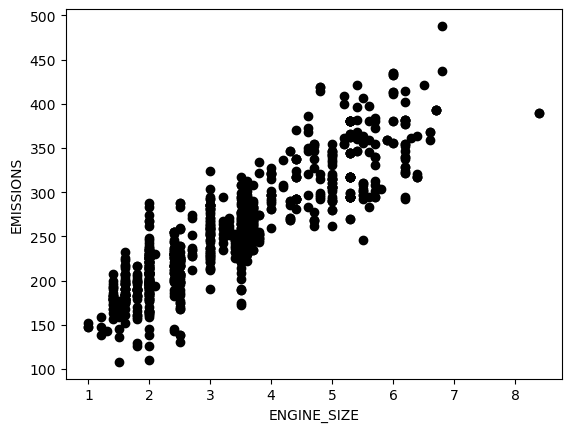

In [35]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS, color = 'black')
plt.xlabel("ENGINE_SIZE")
plt.ylabel("EMISSIONS")
plt.show()


#### Multiple Regression Model

In [25]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
x = np.asanyarray(train[["ENGINESIZE", "CYLINDERS", "FUELCONSUMPTION_COMB"]])
y = np.asanyarray(train[["CO2EMISSIONS"]])
regr.fit(x,y)
print("Coefficient: ", regr.coef_)
                  

Coefficient:  [[12.90847601  6.58340717  9.18615051]]


### Predictions

In [29]:
y_hat = regr.predict(test[["ENGINESIZE","CYLINDERS","FUELCONSUMPTION_COMB"]])
x = np.asanyarray(test[["ENGINESIZE","CYLINDERS","FUELCONSUMPTION_COMB"]])
y = np.asanyarray(test[["CO2EMISSIONS"]])
print("Mean Squared Error: %.2f" %np.mean((y_hat - y) **2))

# Variance Square
print("Variance score: %.2f" % regr.score(x,y))


/lib/python3.11/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


Mean Squared Error: 551.19
Variance score: 0.86


#### Exercise

In [33]:
regr = linear_model.LinearRegression()
x = np.asanyarray(train[["ENGINESIZE", "CYLINDERS","FUELCONSUMPTION_CITY", "FUELCONSUMPTION_HWY"]])
y = np.asanyarray(train[["CO2EMISSIONS"]])
regr.fit(x,y)
print("Coefficients: %.2f ", regr.coef_)

y_hat = regr.predict(test[["ENGINESIZE", "CYLINDERS","FUELCONSUMPTION_CITY", "FUELCONSUMPTION_HWY"]])
x = np.asanyarray(test[["ENGINESIZE", "CYLINDERS","FUELCONSUMPTION_CITY", "FUELCONSUMPTION_HWY"]])
y = np.asanyarray(test[["CO2EMISSIONS"]])
print("Residual sum of squares: %.2f" % np.mean((y_hat - y)**2))
print("Variance Score: %.2f " %regr.score(x,y))

Coefficients: %.2f  [[12.93390618  6.4085629   5.51765458  3.52044219]]


/lib/python3.11/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


Residual sum of squares: 551.25
Variance Score: 0.86 
